# Signal Processing Basics

### Few definitions for question 1

**Rayleigh Frequency :** It is the minimum frequency that we can resolve in a finite duration of time window.
Suppose the time window is T seconds long, then minimum frequency that can be resolved is **1/T Hz**.

**Nyquist Frequency :** It is the maximum frequency that can be measured accurately given a sampling rate. It is given by (sampling rate/2)Hz.

**Resolution of signal :** It's the minimum frequency that we can distinguish in a signal. It can be thought of as a bin size in the sampled signal. I think it is almost same as rayleigh frequency which depends only on time.  

**Range of signal :** It's the range of minimum and maximum value a signal can reach.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
from scipy import signal
from scipy.signal import windows
from __future__ import division

#### 3. Use the Hanning, rectangular and Hamming tapers to compute spectra.Compare spectra between tapers
In the below plots we can observe that the rectangular taper preservers the signal and accounts for all the frequencies and the amplitude while the hamming taper modifies the amplitude of the signal according to normal distribution resulting in the low amplitude of leftmost and rightmost part of signal. Hanning taper also does the same as hamming the only difference is that hamming window accounts for the leftmost and rightmost part of signal with some positive probability while the hanning taper takes it as zero and totally cut off those parts.
###### All the plots are below along with the signal


#### 4. What is the sampling frequency in relation to Nyquist sampling theorem?
Nyquist sampling theorem states that any periodic signal must be sampled at a rate more than or equal to twice the highest frequency component of the signal.
So simply we can say tha sampling frequency is the rate with which we sample our signal and by the nyquist sampling theorem the sampling frequency should be atleast twice of maximum frequency content in the signal. Only if the sampling frequency is more than twice the maximum frequency, we will be able to reproduce the signal theoritically. Practically we may need sampling frequency to be multiple times of maximum frequency available in signal for correctly reproducing the wace. Also, we can say that the Nyquist frequency will be half of sampling frequency.

#### 5. What is the wrap-around of frequency in respect of Nyquist Shannon theorem? Illustrate the phenomenon with example data.
Wrap-around of frequency is a form od aliasing. In which we see the misalignment of the higher frequencies as lower frequencies. It's main cause is low sampling rate, if the sampling rate is below Nyquist sampling rate it will happen.

Aliasing : It's an artifact arises when the signal is sampled slower than the twice of the maximum frequency content of the signal.

#### Example to illustrate wrap-around of frequency
In the below example we can see that when the sampling frequency is below the twice of signal frequency we didn't get the actual signal istead we get a signal with much lower freqeuncy.

Here signal frequency is 10Hz and we sampled it with 15Hz rate( below 20Hz i.e. twice of frequency) as a result we get a signal having 5Hz frequecy which is much lower than 10Hz.
On the other hand if we sample it with 50Hz sampling frequency we get the actual 10Hz signal.

Text(0.5, 0, 'Sample')

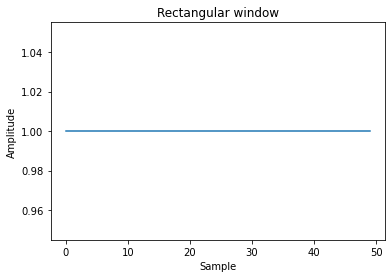

In [2]:
window = signal.windows.boxcar(50)
plt.plot(window)
plt.title("Rectangular window")
plt.ylabel("Amplitude")
plt.xlabel("Sample")

Text(0.5, 0, 'Sample')

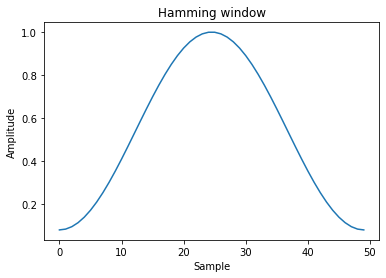

In [3]:
window = signal.windows.hamming(50)
plt.plot(window)
plt.title("Hamming window")
plt.ylabel("Amplitude")
plt.xlabel("Sample")

Text(0.5, 0, 'Sample')

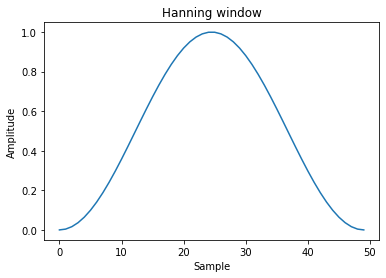

In [4]:
window = signal.windows.hann(50)
plt.plot(window)
plt.title("Hanning window")
plt.ylabel("Amplitude")
plt.xlabel("Sample")

In [5]:
def compute_spectra(wave,fs,time):
    # gives DFT sample frequencies
    freqs = np.fft.fftfreq(time.size, 1/fs)

    # ignoring half the values( all negative values of freqs) since they are complex conjugate of others
    pos = freqs > 0

    # fft values for wave
    fft_vals = np.fft.fft(wave)

    # true theoritical fft
    fft_theo = 2.0*abs(fft_vals/fs)

    # power spectra
    ps = 2.0*(np.abs(fft_vals/time.size)**2)
    print(np.sum(ps[pos]))
    return freqs,fft_vals,pos,fft_theo,ps

In [6]:
def plot_stft(wave,fs):
    f, t, Z = signal.stft(wave, fs, nperseg=100)
    plt.pcolormesh(t, f, np.abs(Z), vmin=0, vmax=A_max, shading='gouraud')
    plt.title('TFR using STFT')
    plt.ylabel('Frequency [Hz]')
    plt.xlabel('Time [sec]')
    plt.show()

In [7]:
def plot_spectra(freqs,fft_vals,pos,fft_theo,ps):
    f, axis=plt.subplots(1,3,figsize=(15,5))
    f.suptitle("Frequency Spectrum", fontsize=15)
    axis[0].plot(freqs,abs(fft_vals))
    axis[0].set_title("FFT")
    axis[0].set_xlabel("Frequency")
    axis[0].set_ylabel("Amplitude")
    axis[1].plot(freqs[pos],fft_theo[pos])
    axis[1].set_title("Theoritical FFT")
    axis[1].set_xlabel("Frequency")
    axis[1].set_ylabel("Amplitude")
    axis[2].plot(freqs[pos],ps[pos])
    axis[2].set_title("Power Spectrum/ Frequency Spectrum")
    axis[2].set_xlabel("Frequency")
    axis[2].set_ylabel("Amplitude")

In [8]:
def zoomed_spectrum_plot(freqs,fft_vals,pos,fft_theo,ps):
    f, axis=plt.subplots(1,3,figsize=(15,5))
    f.suptitle("Zoomed Frequency Spectrum", fontsize=15)
    axis[0].semilogx(freqs,abs(fft_vals))
    axis[0].set_title("FFT")
    axis[0].set_xlabel("Frequency")
    axis[0].set_ylabel("Amplitude")
    axis[1].semilogx(freqs[pos],fft_theo[pos])
    axis[1].set_title("Theoritical FFT")
    axis[1].set_xlabel("Frequency")
    axis[1].set_ylabel("Amplitude")
    axis[2].semilogx(freqs[pos],ps[pos])
    axis[2].set_title("Power Spectrum/ Frequency Spectrum")
    axis[2].set_xlabel("Frequency")
    axis[2].set_ylabel("Amplitude")

In [9]:
def wave_stats(wave):
    mean_wave = np.mean(wave)
    std_wave = np.std(wave)
    var_wave = std_wave**2
    print(f'mean is {mean_wave}\nstandard deviation is {std_wave}\nvariance is {var_wave}')

In [10]:
def windowing(wave,time,isTrue):
    rect_window = signal.windows.boxcar(time.size)
    rect_wave=np.multiply(rect_window,wave)
    hann_window = signal.windows.hann(time.size)
    hann_wave=np.multiply(hann_window,wave)
    hamm_window = signal.windows.hamming(time.size)
    hamm_wave=np.multiply(hamm_window,wave)
    
    f, axis=plt.subplots(1,3,figsize=(18,5))
    if isTrue:
        f.suptitle("Windowing Power Spectrum", fontsize=15)
    else:
        f.suptitle("Windowing the wave", fontsize=15)
   
    axis[0].plot(time,rect_wave)
    axis[0].set_title("Passing through Rectangular window")
    axis[0].set_xlabel("Frequency")
    axis[0].set_ylabel("Amplitude")
    axis[1].plot(time,hann_wave)
    axis[1].set_title("Passing through Hanning window")
    axis[1].set_xlabel("Frequency")
    axis[1].set_ylabel("Amplitude")
    axis[2].plot(time,hamm_wave)
    axis[2].set_title("Passing through Hamming window")
    axis[2].set_xlabel("Frequency")
    axis[2].set_ylabel("Amplitude")

In [11]:
def windowing_power_spectra(wave,time):
    rect_window = signal.windows.boxcar(time.size)
    rect_wave=np.convolve(rect_window,wave)
    hann_window = signal.windows.hann(time.size)
    hann_wave=np.convolve(hann_window,wave)
    hamm_window = signal.windows.hamming(time.size)
    hamm_wave=np.convolve(hamm_window,wave)
    
    f, axis=plt.subplots(1,3,figsize=(18,5))    
    f.suptitle("Windowing Power Spectrum", fontsize=15)
    axis[0].plot(time,rect_wave)
    axis[0].set_title("Passing through Rectangular window")
    axis[0].set_xlabel("Frequency")
    axis[0].set_ylabel("Amplitude")
    axis[1].plot(time,hann_wave)
    axis[1].set_title("Passing through Hanning window")
    axis[1].set_xlabel("Frequency")
    axis[1].set_ylabel("Amplitude")
    axis[2].plot(time,hamm_wave)
    axis[2].set_title("Passing through Hamming window")
    axis[2].set_xlabel("Frequency")
    axis[2].set_ylabel("Amplitude")

3.6617853566353156e-28


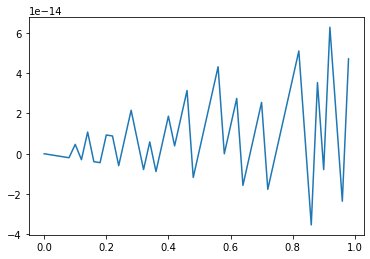

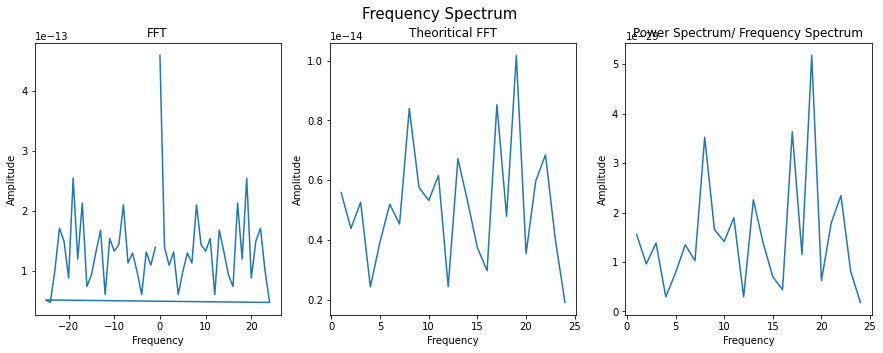

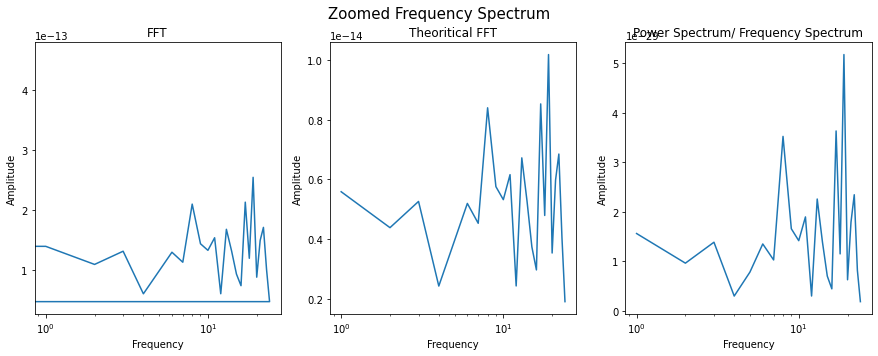

In [15]:
fs = 50  # sampling frequency
N = 1
time = np.arange(0,N,1/fs)
A_max = 1
freq = 100
wave = A_max*np.sin(2*np.pi*freq*time)
plt.plot(time,wave,label="sampled with 15Hz")

freqs,fft_vals,pos,fft_theo,ps = compute_spectra(wave,fs,time)
plot_spectra(freqs,fft_vals,pos,fft_theo,ps)
zoomed_spectrum_plot(freqs,fft_vals,pos,fft_theo,ps)

0.5


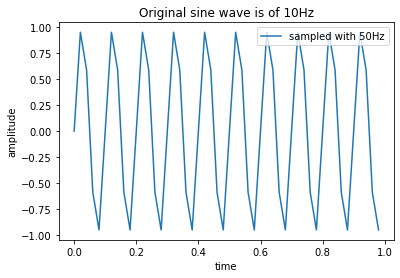

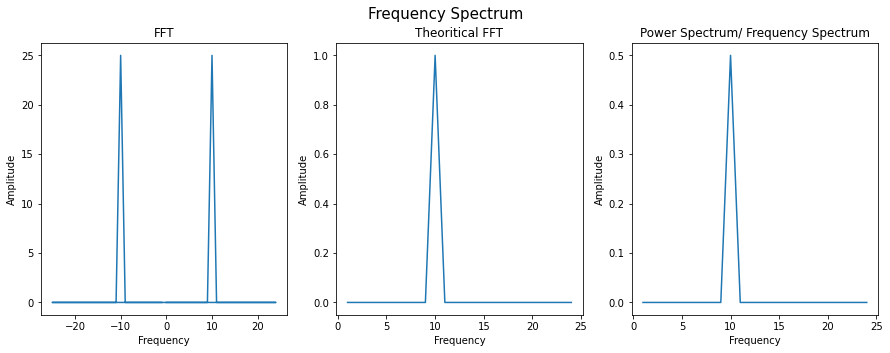

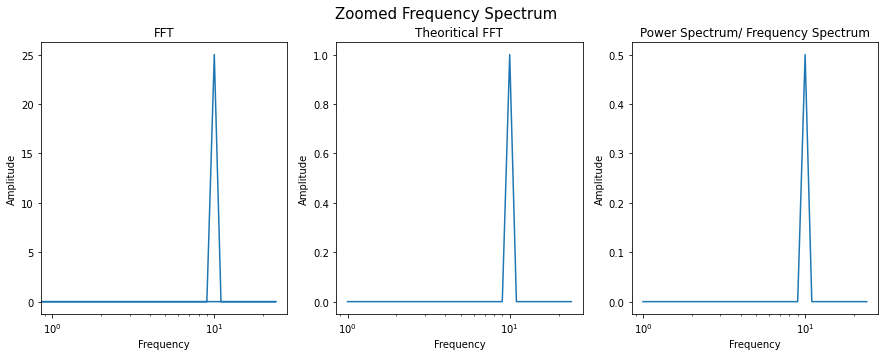

In [13]:
fs = 50  # sampling frequency
N = 1
time = np.arange(0,N,1/fs)
A_max = 1
freq = 10
wave = A_max*np.sin(2*np.pi*freq*time)
plt.plot(time,wave,label = "sampled with 50Hz")
plt.xlabel("time")
plt.ylabel("amplitude")
plt.title("Original sine wave is of 10Hz")
plt.legend()

freqs,fft_vals,pos,fft_theo,ps = compute_spectra(wave,fs,time)
plot_spectra(freqs,fft_vals,pos,fft_theo,ps)
zoomed_spectrum_plot(freqs,fft_vals,pos,fft_theo,ps)

## Composite Sine wave

Signal looks like a sinusoidal having multiple frequencies. 

Sampling rate : 150

Nyquist frequency : 75 Hz

Max Amplitude : 2.5

frequencies in wave : 5Hz, 15Hz

range : -2.5 to 2.5

We **can't** listen to this signal since no frequency in this signal falls in audible frequency range (20Hz - 20KHz) of human ear.

In [399]:
fs = 150  # sampling frequency
N = 1
time = np.arange(0,N,1/fs)
A_max = 1
freq = 5
wave1 = A_max*np.sin(2*np.pi*freq*time)
wave2 = 2*A_max*np.sin(2*np.pi*freq*3*time)
wave = wave1+wave2

Text(0, 0.5, 'Amplitude')

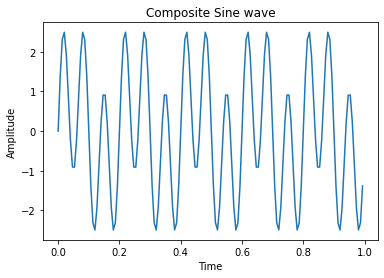

In [400]:
plt.plot(time, wave)
plt.title("Composite Sine wave")
plt.xlabel("Time")
plt.ylabel("Amplitude")

In [401]:
wave_stats(wave)

mean is 4.7369515717340015e-17
standard deviation is 1.5811388300841893
variance is 2.499999999999999


2.4999999999999996


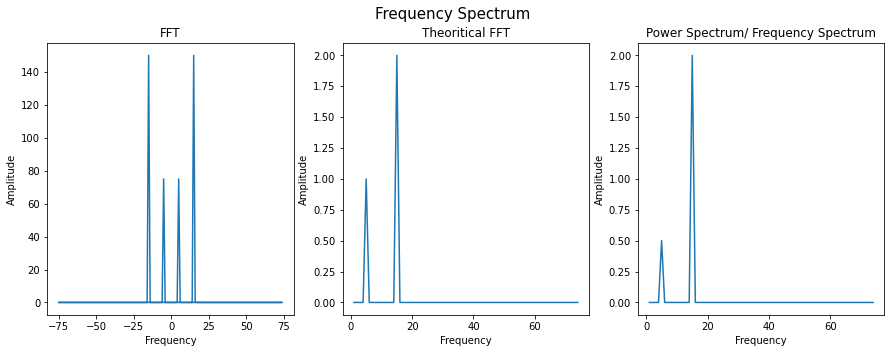

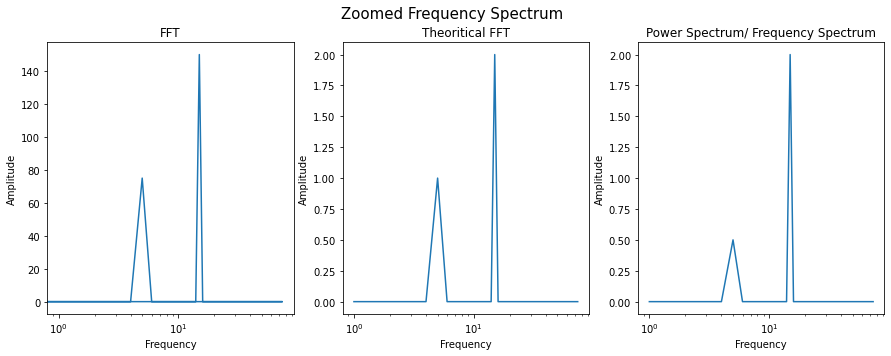

In [402]:
freqs,fft_vals,pos,fft_theo,ps = compute_spectra(wave,fs,time)
plot_spectra(freqs,fft_vals,pos,fft_theo,ps)
zoomed_spectrum_plot(freqs,fft_vals,pos,fft_theo,ps)

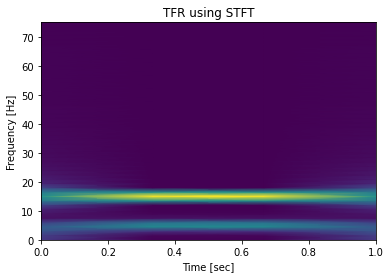

In [403]:
plot_stft(wave,fs)

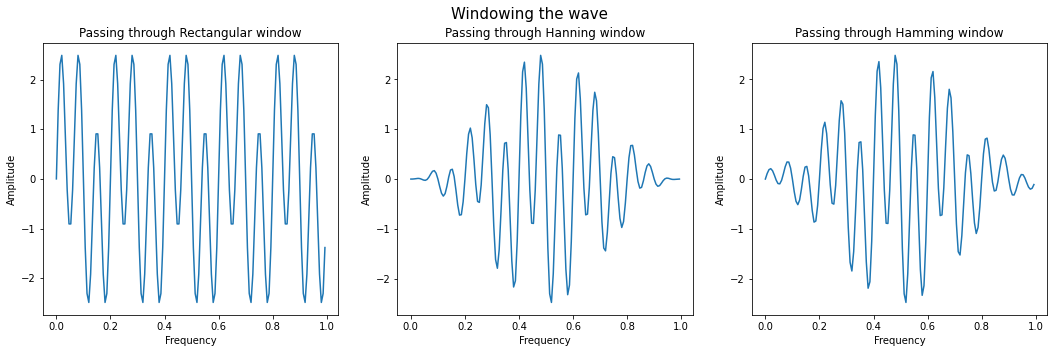

In [404]:
windowing(wave,time,False)

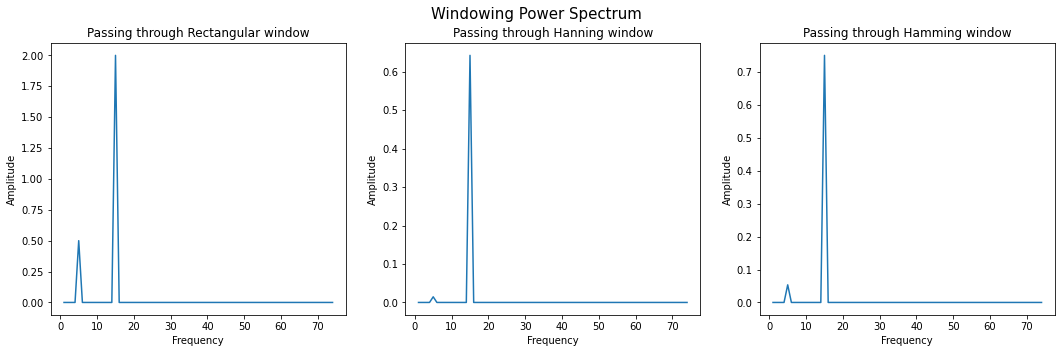

In [405]:
windowing(ps[pos],freqs[pos],True)

## Chirp Signal (linear)

Signal looks like a chirp having multiple frequencies going from low to high frequencies. 

Sampling rate : 200

Nyquist frequency : 100 Hz

Rayleigh frequency : 0.5Hz

Max Amplitude : 1

frequencies in wave : 0 to 40Hz

range : -1 to 1

We **can** listen to this signal but not completely, since 20-40Hz frequency in this signal falls in audible frequency range (20Hz - 20KHz) of human ear.

In [406]:
fs = 200  # sampling frequency
N = 2
time = np.arange(0,N,1/fs)
A_max = 1
freq = 10*time
wave = A_max*np.sin(2*np.pi*freq*time)

Text(0, 0.5, 'Frequency')

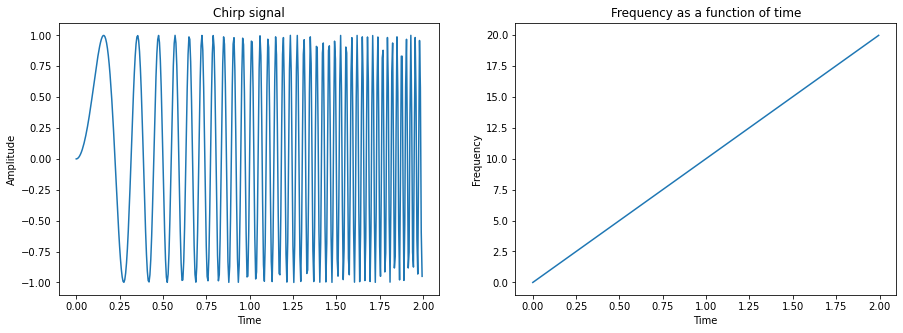

In [407]:
f, axis=plt.subplots(1,2,figsize=(15,5))
axis[0].plot(time, wave)
axis[0].set_title("Chirp signal")
axis[0].set_xlabel("Time")
axis[0].set_ylabel("Amplitude")
axis[1].plot(time, freq)
axis[1].set_title("Frequency as a function of time")
axis[1].set_xlabel("Time")
axis[1].set_ylabel("Frequency")

In [408]:
wave_stats(wave)

mean is 0.037808016949663396
standard deviation is 0.6961289260286452
variance is 0.48459548165379496


0.48459465687179576


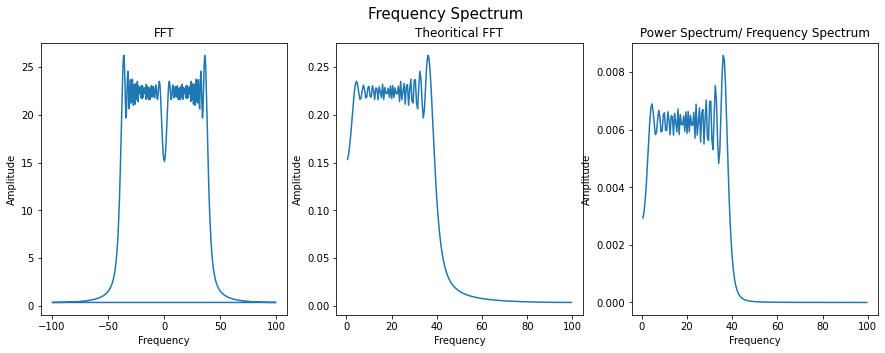

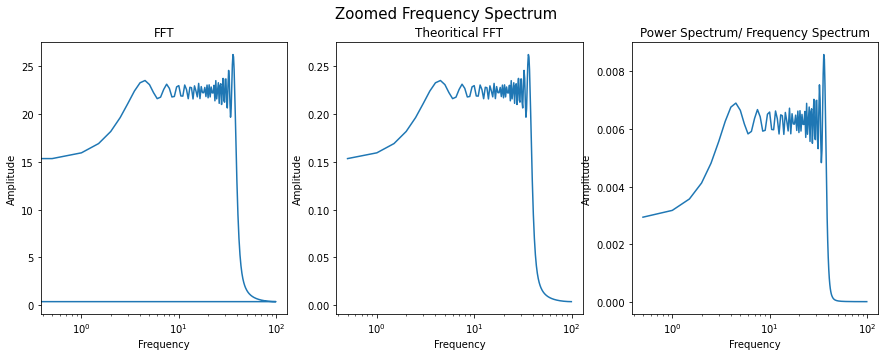

In [409]:
freqs,fft_vals,pos,fft_theo,ps = compute_spectra(wave,fs,time)
plot_spectra(freqs,fft_vals,pos,fft_theo,ps)
zoomed_spectrum_plot(freqs,fft_vals,pos,fft_theo,ps)

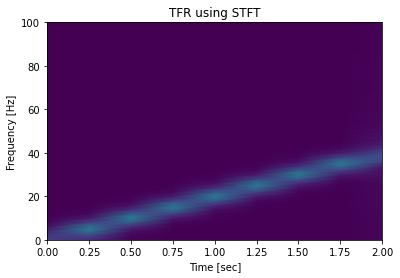

In [410]:
plot_stft(wave,fs)

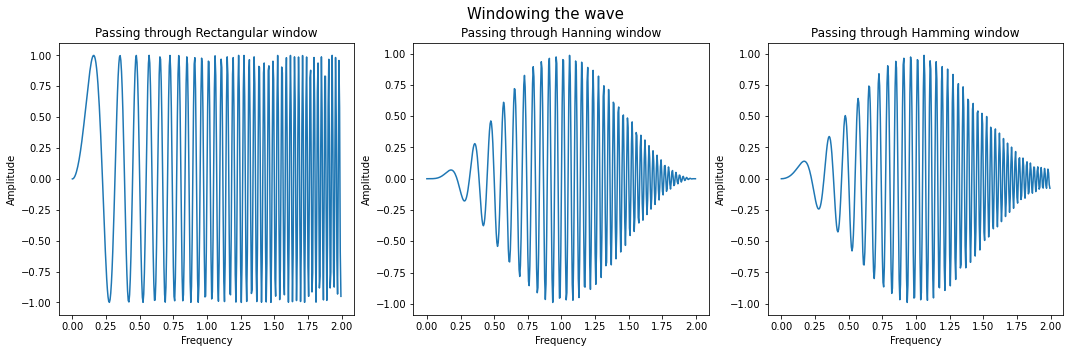

In [411]:
windowing(wave,time,False)

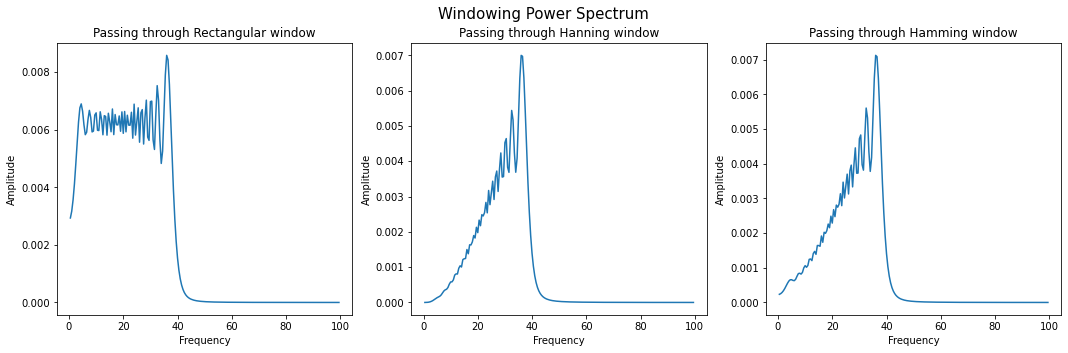

In [412]:
windowing(ps[pos],freqs[pos],True)

## Chirp Signal ( exponential decay)

Signal looks like a chirp having multiple frequencies going from high to low frequencies. Signal has very sharp lines. 

Sampling rate : 150

Nyquist frequency : 75 Hz

Rayleigh frequency : 1.1 Hz

frequencies in wave : 0 to 75Hz

range : -1.25 to 0.75

We **can** listen to this signal but not completely, since 20-75Hz frequency in this signal falls in audible frequency range (20Hz - 20KHz) of human ear.

In [413]:
fs = 150  # sampling frequency
N = 1
time = np.arange(0.1,N,1/fs)
A_max = 1
freq = 1/time
wave = A_max*np.sin(2*np.pi*freq*time)

Text(0, 0.5, 'Frequency')

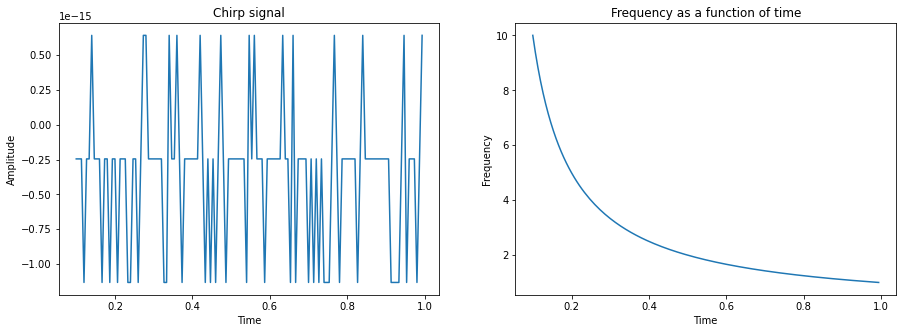

In [414]:
f, axis=plt.subplots(1,2,figsize=(15,5))
axis[0].plot(time, wave)
axis[0].set_title("Chirp signal")
axis[0].set_xlabel("Time")
axis[0].set_ylabel("Amplitude")
axis[1].plot(time, freq)
axis[1].set_title("Frequency as a function of time")
axis[1].set_xlabel("Time")
axis[1].set_ylabel("Frequency")

In [415]:
wave_stats(wave)

mean is -3.5677404971763457e-16
standard deviation is 5.119875278197581e-16
variance is 2.6213122864298753e-31


2.6213122864298744e-31


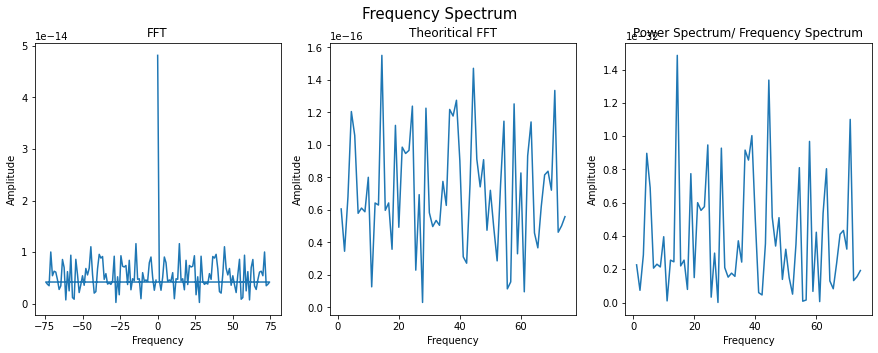

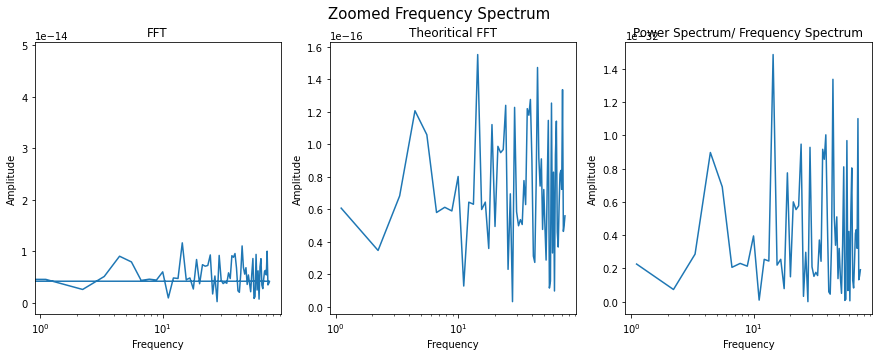

In [416]:
freqs,fft_vals,pos,fft_theo,ps = compute_spectra(wave,fs,time)
plot_spectra(freqs,fft_vals,pos,fft_theo,ps)
zoomed_spectrum_plot(freqs,fft_vals,pos,fft_theo,ps)

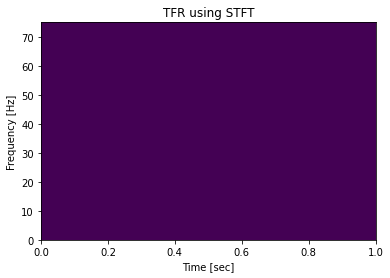

In [417]:
plot_stft(wave,fs)

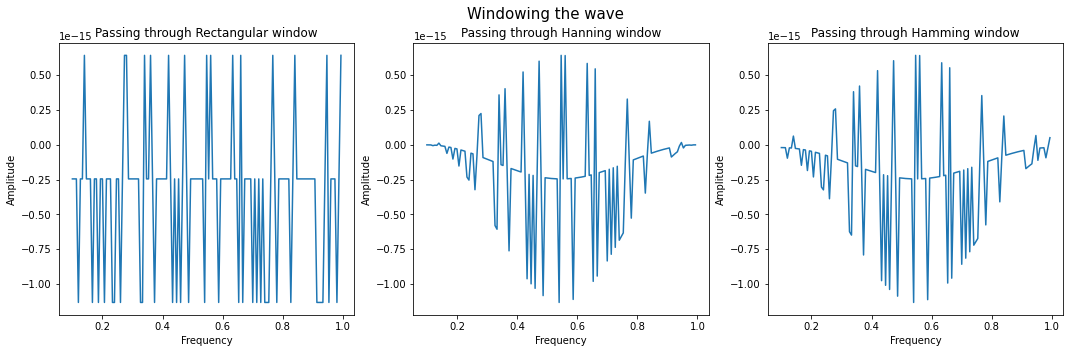

In [418]:
windowing(wave,time,False)

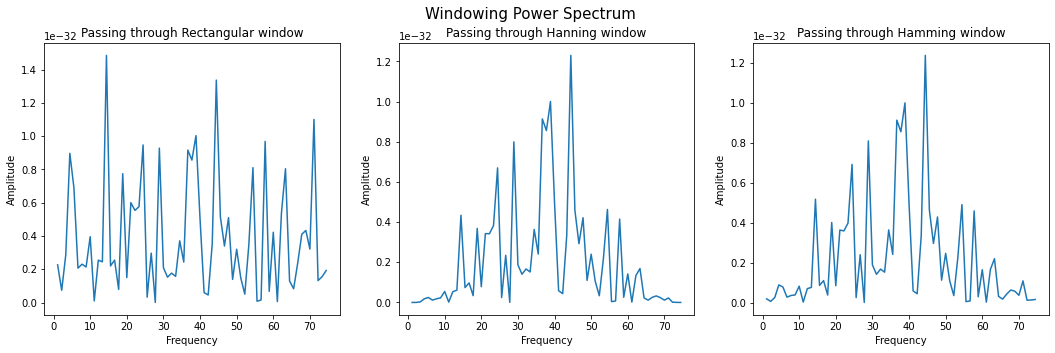

In [419]:
windowing(ps[pos],freqs[pos],True)

## Chirp Signal (quadratic)

Signal looks like a chirp having multiple frequencies going from low to high frequencies. It looks sinusoidal with changing frequencies.

Sampling rate : 200

Nyquist frequency : 100 Hz

Rayleigh frequency : 0.5 Hz

frequencies in wave : 0 to 60Hz

range : -1 to 1

We **can** listen to this signal but not completely, since 20-60Hz frequency in this signal falls in audible frequency range (20Hz - 20KHz) of human ear.

In [420]:
fs = 200  # sampling frequency
N = 2
time = np.arange(0,N,1/fs)
A_max = 1
freq = 5*time*time + time +1
wave = A_max*np.sin(2*np.pi*freq*time)

Text(0, 0.5, 'Frequency')

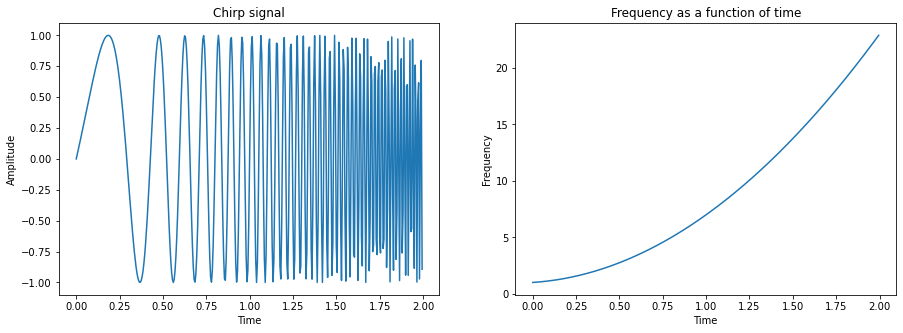

In [421]:
f, axis=plt.subplots(1,2,figsize=(15,5))
axis[0].plot(time, wave)
axis[0].set_title("Chirp signal")
axis[0].set_xlabel("Time")
axis[0].set_ylabel("Amplitude")
axis[1].plot(time, freq)
axis[1].set_title("Frequency as a function of time")
axis[1].set_xlabel("Time")
axis[1].set_ylabel("Frequency")

In [422]:
wave_stats(wave)

mean is 0.06257776175836531
standard deviation is 0.7011264697580856
variance is 0.49157832659543566


0.4915742474165683


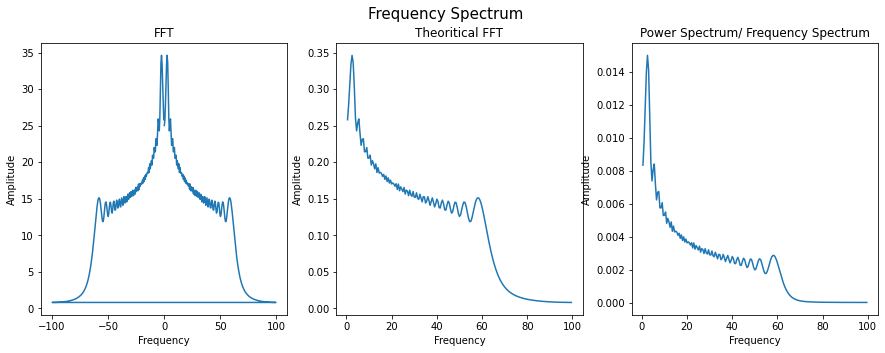

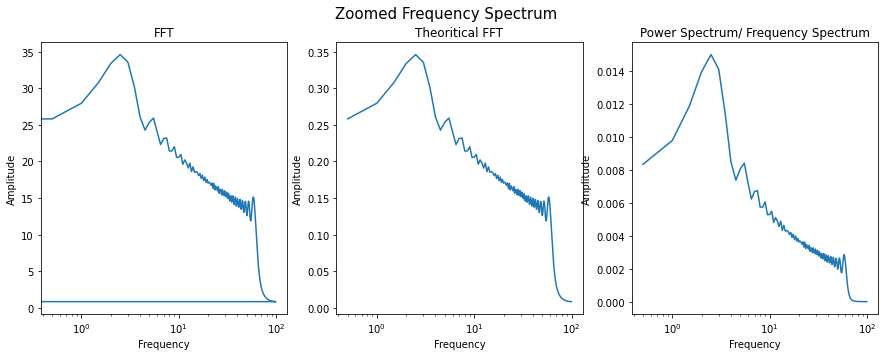

In [423]:
freqs,fft_vals,pos,fft_theo,ps = compute_spectra(wave,fs,time)
plot_spectra(freqs,fft_vals,pos,fft_theo,ps)
zoomed_spectrum_plot(freqs,fft_vals,pos,fft_theo,ps)

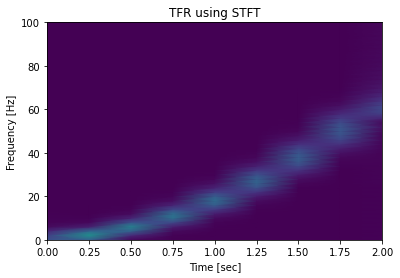

In [424]:
plot_stft(wave,fs)

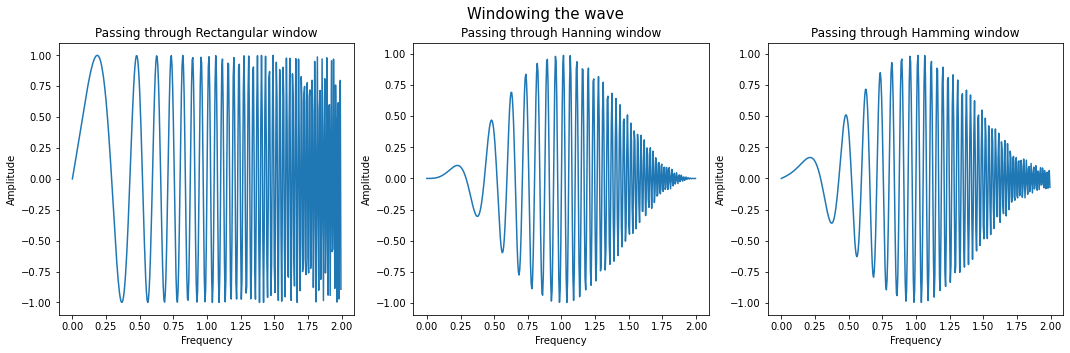

In [425]:
windowing(wave,time,False)

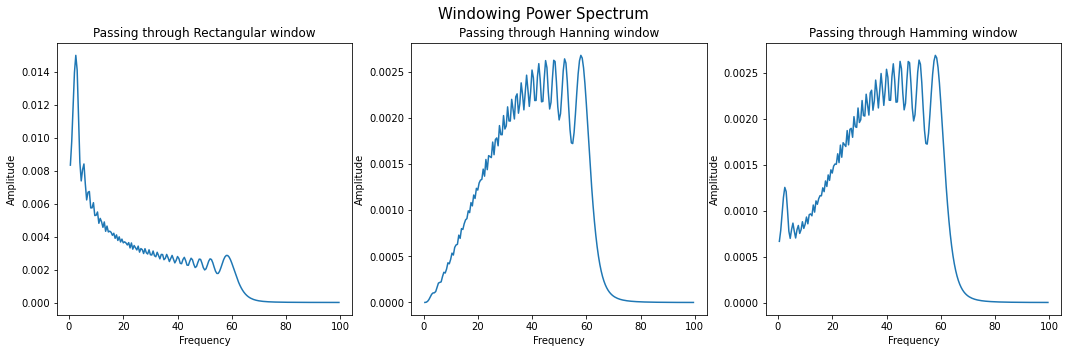

In [426]:
windowing(ps[pos],freqs[pos],True)

## Chirp Signal (logarithmic)

Signal looks like a chirp having multiple frequencies going from low to high frequencies. It looks sinusoidal with changing frequencies.

Sampling rate : 400

Nyquist frequency : 200 Hz

Rayleigh frequency : 0.25 Hz

frequencies in wave : 0 to 40Hz

range : -1 to 1

We **can** listen to this signal but not completely, since 20-40Hz frequency in this signal falls in audible frequency range (20Hz - 20KHz) of human ear.

In [427]:
fs = 400  # sampling frequency
N = 4
time = np.arange(0.1,N,1/fs)
A_max = 1
freq = 10*np.log(time)
wave = A_max*np.sin(2*np.pi*freq*time)

Text(0, 0.5, 'Frequency')

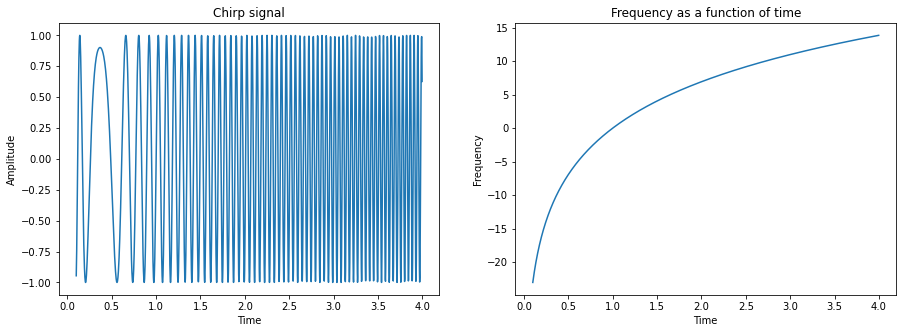

In [428]:
f, axis=plt.subplots(1,2,figsize=(15,5))
axis[0].plot(time, wave)
axis[0].set_title("Chirp signal")
axis[0].set_xlabel("Time")
axis[0].set_ylabel("Amplitude")
axis[1].plot(time, freq)
axis[1].set_title("Frequency as a function of time")
axis[1].set_xlabel("Time")
axis[1].set_ylabel("Frequency")

In [429]:
wave_stats(wave)

mean is 0.018872056927724788
standard deviation is 0.7055143376609677
variance is 0.49775048064519395


0.4977502620555557


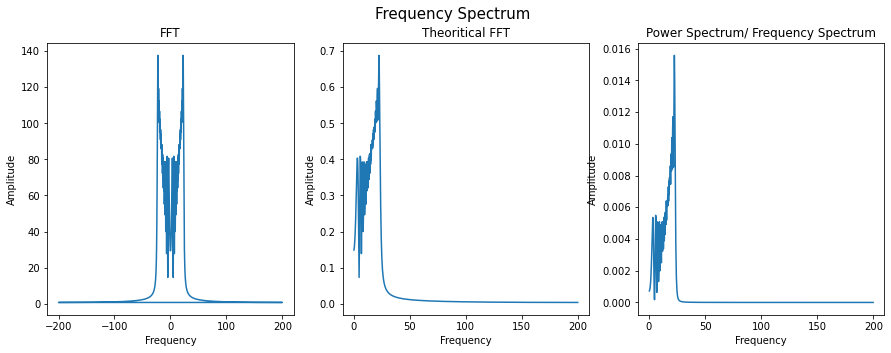

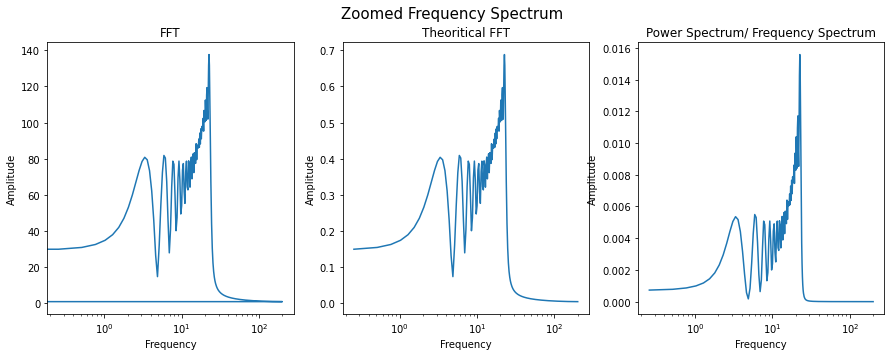

In [430]:
freqs,fft_vals,pos,fft_theo,ps = compute_spectra(wave,fs,time)
plot_spectra(freqs,fft_vals,pos,fft_theo,ps)
zoomed_spectrum_plot(freqs,fft_vals,pos,fft_theo,ps)

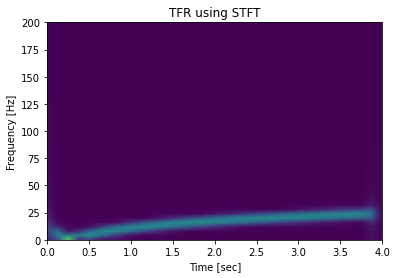

In [431]:
plot_stft(wave,fs)

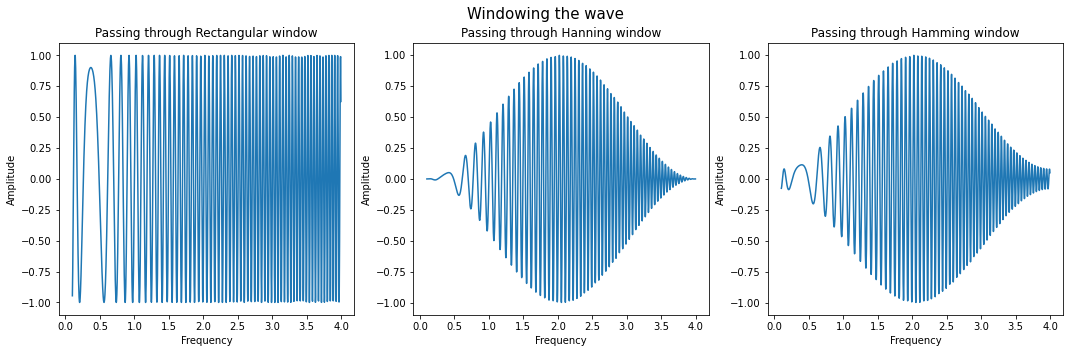

In [432]:
windowing(wave,time,False)

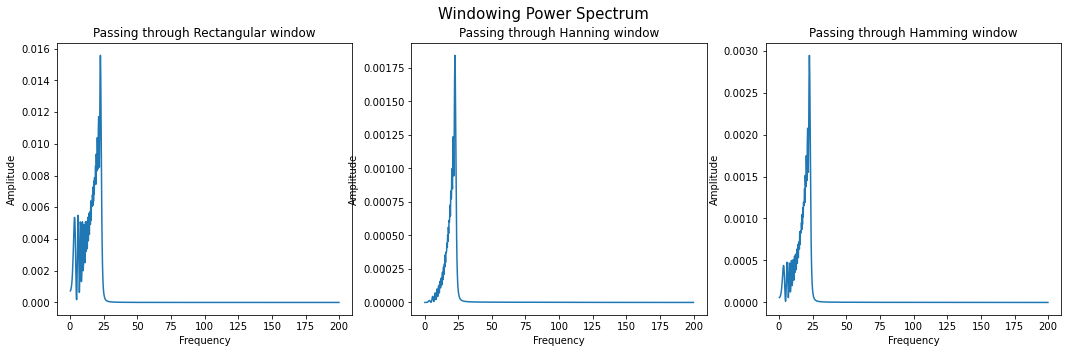

In [433]:
windowing(ps[pos],freqs[pos],True)

## Chirp Signal (sinusoidal)

Signal looks like a chirp having multiple frequencies going in sinusoidal fashion. It looks sinusoidal with changing frequencies.

Sampling rate : 100

Nyquist frequency : 50 Hz

Rayleigh frequency : 0.1 Hz

frequencies in wave : 0 to 50Hz

range : -1 to 1

We **can** listen to this signal but not completely, since 20-50Hz frequency in this signal falls in audible frequency range (20Hz - 20KHz) of human ear.

In [434]:
fs = 100  # sampling frequency
N = 10
time = np.arange(0,N,1/fs)
A_max = 1
freq = 5*np.sin(time)  #concave function in [0,pi]
wave = A_max*np.sin(2*np.pi*freq*time)

Text(0, 0.5, 'Frequency')

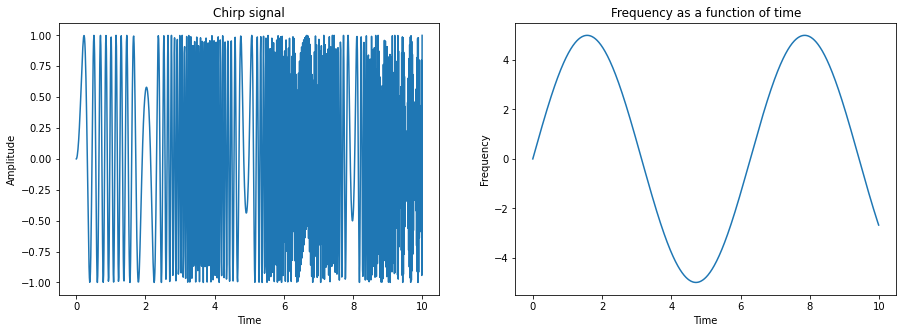

In [435]:
f, axis=plt.subplots(1,2,figsize=(15,5))
axis[0].plot(time, wave)
axis[0].set_title("Chirp signal")
axis[0].set_xlabel("Time")
axis[0].set_ylabel("Amplitude")
axis[1].plot(time, freq)
axis[1].set_title("Frequency as a function of time")
axis[1].set_xlabel("Time")
axis[1].set_ylabel("Frequency")

In [436]:
wave_stats(wave)

mean is 0.017552661642245865
standard deviation is 0.6891389314414382
variance is 0.4749124668282473


0.4749026397560238


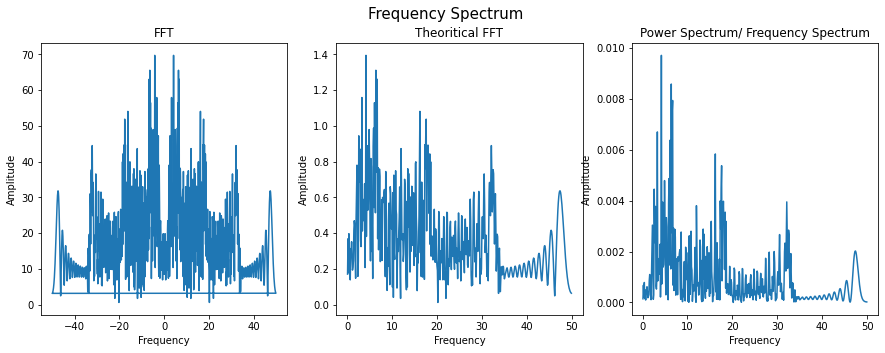

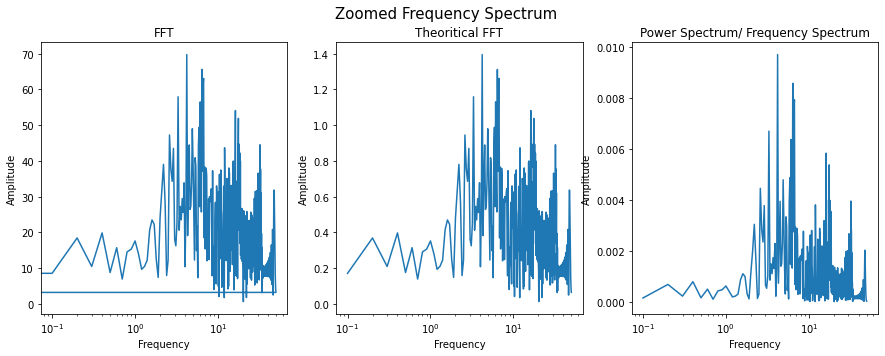

In [437]:
freqs,fft_vals,pos,fft_theo,ps = compute_spectra(wave,fs,time)
plot_spectra(freqs,fft_vals,pos,fft_theo,ps)
zoomed_spectrum_plot(freqs,fft_vals,pos,fft_theo,ps)

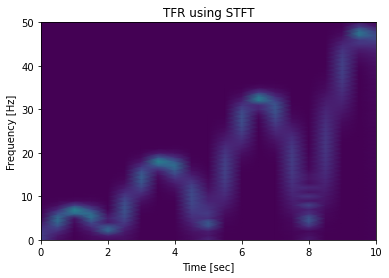

In [438]:
plot_stft(wave,fs)

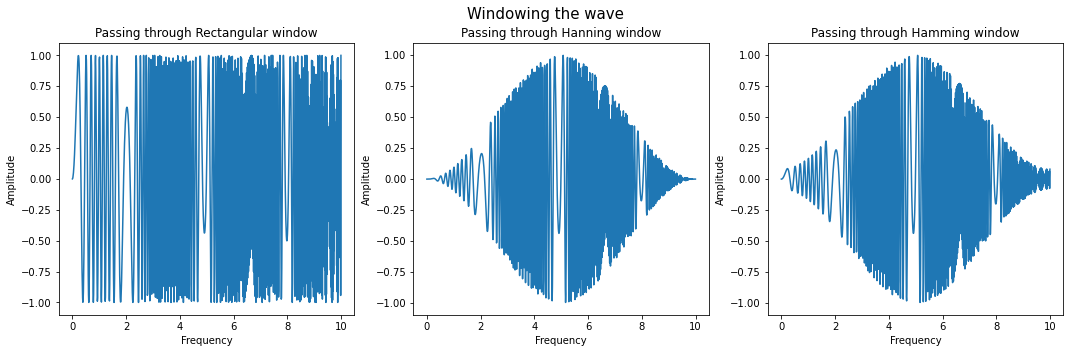

In [439]:
windowing(wave,time,False)

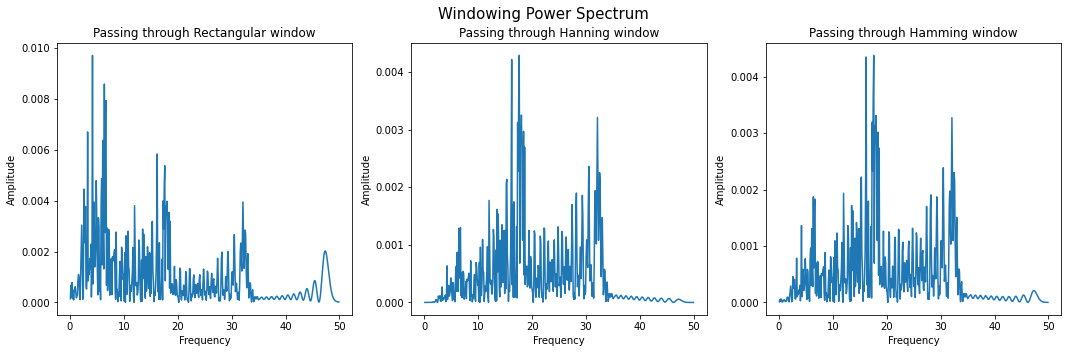

In [440]:
windowing(ps[pos],freqs[pos],True)

## Chirp Signal (exponential)

Signal looks like a chirp having multiple frequencies going from low to high frequencies. It looks sinusoidal with changing frequencies.

Sampling rate : 300

Nyquist frequency : 150 Hz

Rayleigh frequency : 0.5 Hz

frequencies in wave : 0 to 50Hz

range : -1 to 1

We **can** listen to this signal but not completely, since 20-50Hz frequency in this signal falls in audible frequency range (20Hz - 20KHz) of human ear.

In [441]:
fs = 300  # sampling frequency
N = 2
time = np.arange(0,N,1/fs)
A_max = 1
freq = 2*np.exp(time)  #convex function
wave = A_max*np.sin(2*np.pi*freq*time)

Text(0, 0.5, 'Frequency')

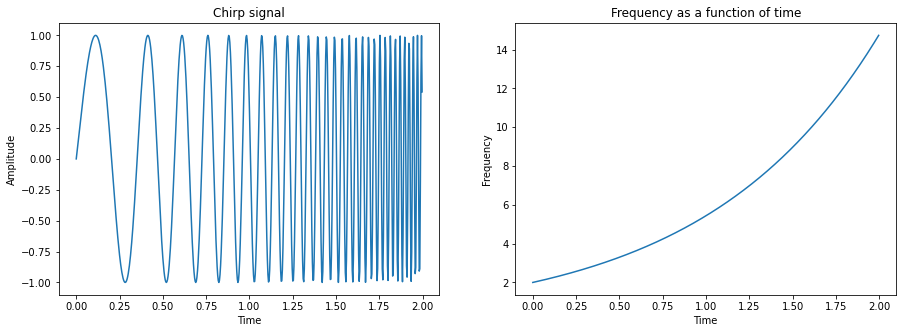

In [442]:
f, axis=plt.subplots(1,2,figsize=(15,5))
axis[0].plot(time, wave)
axis[0].set_title("Chirp signal")
axis[0].set_xlabel("Time")
axis[0].set_ylabel("Amplitude")
axis[1].plot(time, freq)
axis[1].set_title("Frequency as a function of time")
axis[1].set_xlabel("Time")
axis[1].set_ylabel("Frequency")

In [443]:
wave_stats(wave)

mean is 0.039912350178782564
standard deviation is 0.7052294097398036
variance is 0.4973485203619518


0.49734850575065565


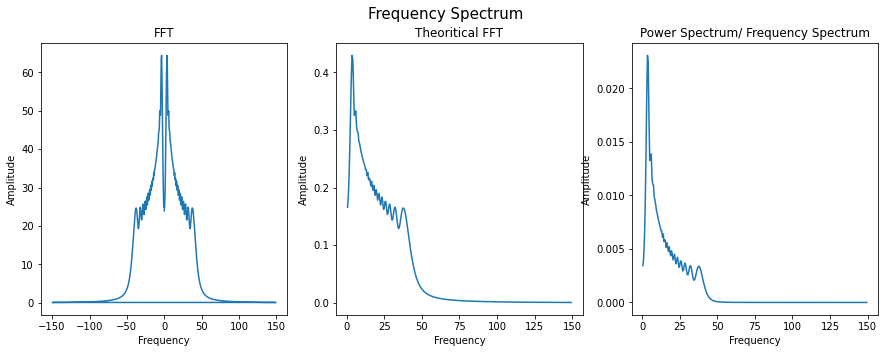

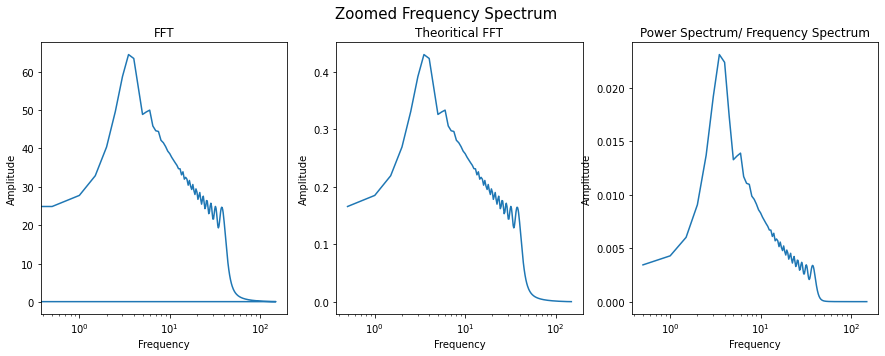

In [444]:
freqs,fft_vals,pos,fft_theo,ps = compute_spectra(wave,fs,time)
plot_spectra(freqs,fft_vals,pos,fft_theo,ps)
zoomed_spectrum_plot(freqs,fft_vals,pos,fft_theo,ps)

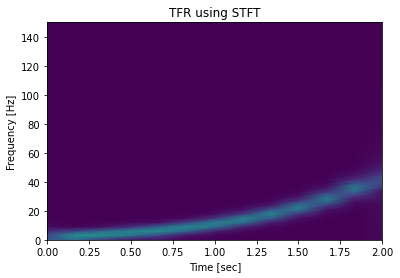

In [445]:
plot_stft(wave,fs)

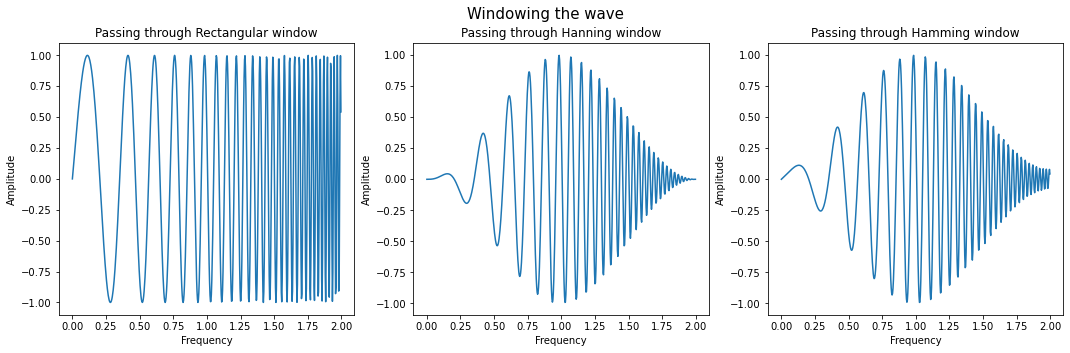

In [446]:
windowing(wave,time,False)

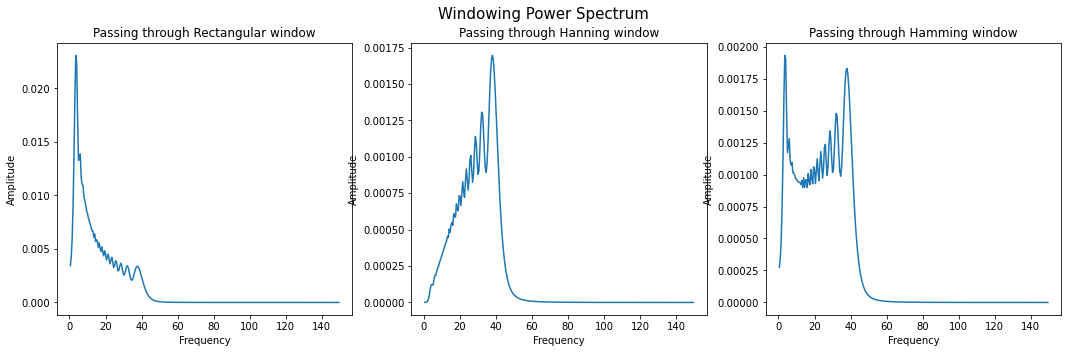

In [447]:
windowing(ps[pos],freqs[pos],True)

## Filter Design

In [448]:
def plot_filter(x,y,order):
    plt.semilogx(x,y,label=f'order:{order}')
    plt.title('Filter frequency response')
    plt.xlabel('Frequency')
    plt.ylabel('Amplitude')
    plt.margins(0,0.1)
    plt.legend()
    plt.grid()

In [455]:
def butter_lowpass(order,cutoff):
    n, d = signal.butter(order,cutoff, 'low', analog=True)
    w,h = signal.freqs(n,d)
    plot_filter(w,abs(h),order)

In [456]:
def butter_highpass(order,cutoff):
    n, d = signal.butter(order, cutoff, 'high', analog=True)
    w,h = signal.freqs(n,d)
    plot_filter(w,abs(h),order)

In [457]:
def butter_bandpass(order,low,high):
    n, d = signal.butter(order,(low,high), 'bandpass', analog=True)
    w,h = signal.freqs(n,d)
    plot_filter(w,abs(h),order)

In [458]:
def butter_bandstop(order,low,high):
    n, d = signal.butter(order,(low,high), 'bandstop', analog=True)
    w,h = signal.freqs(n,d)
    plot_filter(w,abs(h),order)

### Low pass filter - 100 Hz

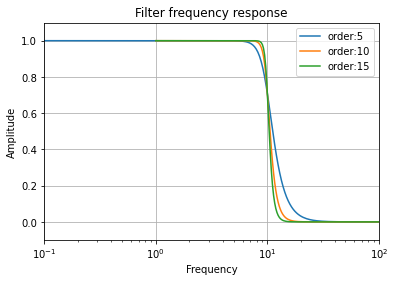

In [459]:
butter_lowpass(5,10)
butter_lowpass(10,10)
butter_lowpass(15,10)

### High Pass Filter – 0.1 Hz

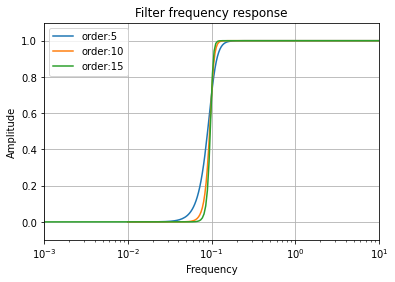

In [460]:
butter_highpass(5,0.1)
butter_highpass(10,0.1)
butter_highpass(15,0.1)

### High Pass Filter – 1 Hz

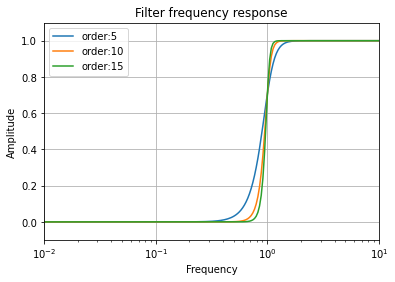

In [461]:
butter_highpass(5,1)
butter_highpass(10,1)
butter_highpass(15,1)

### Band Pass Filter – 0.1-100 Hz


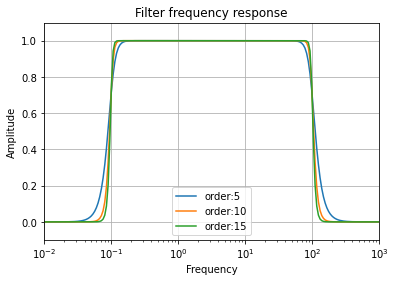

In [462]:
butter_bandpass(5,0.1,100)
butter_bandpass(10,0.1,100)
butter_bandpass(15,0.1,100)

### Band Pass Filter – 1-100 Hz

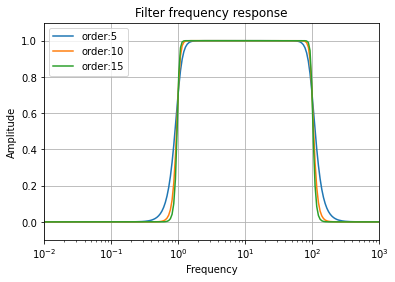

In [463]:
butter_bandpass(5,1,100)
butter_bandpass(10,1,100)
butter_bandpass(15,1,100)

### Band Stop Filter – 45-55 Hz


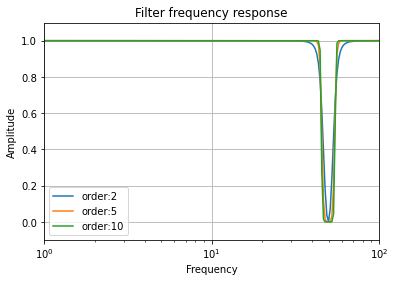

In [464]:
butter_bandstop(2,45,55)
butter_bandstop(5,45,55)
butter_bandstop(10,45,55)

#### Change the order of the filter – how does the roll-off rate change? What is the relation between roll-off rate and order of the filter?
With increase in order of the filter the roll-off rate increase.
So we can conclude that higher the order of filter, faster the roll off rate will be.
